In [2]:
%matplotlib inline

In [3]:
import sys
sys.path.append('/project/avd/iris/resources/git/iris-sample-data')

# An introduction to Iris

## Course Aim

The aim of this course is to introduce Iris and its main features and functionality, with a focus on how these relate to data analysis.

## Setup

In [4]:
import iris
import numpy as np

In [5]:
print(iris.__version__)
print(np.__version__)

2.1.0
1.15.1


## The Iris cube

**Learning outcome**: by the end of this section, you will be able to explain the capabilities and functionality of Iris cubes and coordinates.

The top level object in Iris is called a cube. A cube contains data and metadata about a single phenomenon and is an implementation of the data model interpreted from the *Climate and Forecast (CF) Metadata Conventions*.

Each cube has:

 * A data array (typically a NumPy array).
 * A "name", preferably a CF "standard name" to describe the phenomenon that the cube represents.
 * A collection of coordinates to describe each of the dimensions of the data array. These coordinates are split into two types:
    * Dimensioned coordinates are numeric, monotonic (continuous) and represent a single dimension of the data array. There may be only one dimensioned coordinate per data dimension.
    * Auxilliary coordinates can be of any type, including discrete values such as strings, and may represent more than one data dimension.

A fuller explanation is available in the [Iris user guide](http://scitools.org.uk/iris/docs/latest/userguide/iris_cubes.html).

Let's take a simple example to demonstrate the cube concept.

Suppose we have a ``(3, 2, 4)`` NumPy array:

![](../images/multi_array.png)


Where dimensions 0, 1, and 2 have lengths 3, 2 and 4 respectively.

The Iris cube to represent this data may consist of:

 * a standard name of "air_temperature" and units of "kelvin"

 * a data array of shape ``(3, 2, 4)``

 * a coordinate, mapping to dimension 0, consisting of:
     * a standard name of "height" and units of "meters"
     * an array of length 3 representing the 3 height points
     
 * a coordinate, mapping to dimension 1, consisting of:
     * a standard name of "latitude" and units of "degrees"
     * an array of length 2 representing the 2 latitude points
     * a coordinate system such that the latitude points could be fully located on the globe
     
 * a coordinate, mapping to dimension 2, consisting of:
     * a standard name of "longitude" and units of "degrees"
     * an array of length 4 representing the 4 longitude points
     * a coordinate system such that the longitude points could be fully located on the globe

Pictorially the cube has taken on more information than a simple array:

![](../images/multi_array_to_cube.png)

### Working with a cube

Whilst it is possible to construct a cube by hand, a far more common approach to getting hold of a cube is to use the Iris load function to access data that already exists in a file.

In [6]:
fname = iris.sample_data_path('uk_hires.pp')
cubes = iris.load(fname)
print(cubes)

0: air_potential_temperature / (K)     (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)
1: surface_altitude / (m)              (grid_latitude: 204; grid_longitude: 187)


In [7]:
cubes

[<iris 'Cube' of air_potential_temperature / (K) (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)>,
<iris 'Cube' of surface_altitude / (m) (grid_latitude: 204; grid_longitude: 187)>]

We can see that we've loaded two cubes, one representing the "surface_altitude" and the other representing "air_potential_temperature". We can infer even more detail from this printout; for example, what are the dimensions and shape of the "air_potential_temperature" cube?

Above we've printed the ``iris.cube.CubeList`` instance representing all of the cubes found in the given filename. However, we can see more detail by printing individual cubes:

In [8]:
air_pot_temp = cubes[0]
print(air_pot_temp)

air_potential_temperature / (K)     (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)
     Dimension coordinates:
          time                           x                      -                 -                    -
          model_level_number             -                      x                 -                    -
          grid_latitude                  -                      -                 x                    -
          grid_longitude                 -                      -                 -                    x
     Auxiliary coordinates:
          forecast_period                x                      -                 -                    -
          level_height                   -                      x                 -                    -
          sigma                          -                      x                 -                    -
          surface_altitude               -                      -                 x                

### Cube attributes

In [9]:
cube = iris.load_cube(iris.sample_data_path('A1B_north_america.nc'))
print(cube)

air_temperature / (K)               (time: 240; latitude: 37; longitude: 49)
     Dimension coordinates:
          time                           x              -              -
          latitude                       -              x              -
          longitude                      -              -              x
     Auxiliary coordinates:
          forecast_period                x              -              -
     Scalar coordinates:
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m
     Attributes:
          Conventions: CF-1.5
          Model scenario: A1B
          STASH: m01s03i236
          source: Data from Met Office Unified Model 6.05
     Cell methods:
          mean: time (6 hour)


/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'latitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'longitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'time' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2036: UserWarning: Gracefully filling 'tim

To access a cube's data array the ``data`` property exists. This is either a NumPy array or in some cases a NumPy masked array. It is very important to note that for most of the supported filetypes in Iris, the cube's data isn't actually loaded until you request it via this property (either directly or indirectly). After you've accessed the data once, it is stored on the cube and thus won't be loaded from disk again.

To find the shape of a cube's data it is possible to call ``cube.data.shape`` or ``cube.data.ndim``, but this will trigger any unloaded data to be loaded. Therefore ``shape`` and ``ndim`` are properties available directly on the cube that do not unnecessarily load data.

In [10]:
print(cube.shape)
print(cube.ndim)
print(type(cube.data))

(240, 37, 49)
3
<class 'numpy.ma.core.MaskedArray'>


The ``standard_name``, ``long_name`` and to an extent ``var_name`` are all attributes to describe the phenomenon that the cube represents. The ``name()`` method is a convenience that looks at the name attributes in the order they are listed above, returning the first non-empty string. To rename a cube, it is possible to set the attributes manually, but it is generally easier to use the ``rename()`` method.


In [11]:
print(cube.standard_name)
print(cube.long_name)
print(cube.var_name)
print(cube.name())

air_temperature
None
air_temperature
air_temperature


In [12]:
cube.rename("A name that isn't a valid CF standard name")

In [13]:
print(cube.standard_name)
print(cube.long_name)
print(cube.var_name)
print(cube.name())

None
A name that isn't a valid CF standard name
None
A name that isn't a valid CF standard name


The ``units`` attribute on a cube tells us the units of the numbers held in the data array. We can manually change the units, or better, we can convert the cube to another unit using the ``convert_units`` method, which will automatically update the data array.

In [14]:
print(cube.units)
print(cube.data.max())
cube.convert_units('Celsius')
print(cube.units)
print(cube.data.max())

K
306.0733
Celsius
32.9233


A cube has a dictionary for extra general purpose attributes, which can be accessed with the ``cube.attributes`` attribute:

In [15]:
print(cube.attributes)
print(cube.attributes['STASH'])

{'Conventions': 'CF-1.5', 'STASH': STASH(model=1, section=3, item=236), 'Model scenario': 'A1B', 'source': 'Data from Met Office Unified Model 6.05'}
m01s03i236


## Coordinates

As we've seen, cubes need coordinate information to help us describe the underlying phenomenon. Typically a cube's coordinates are accessed with the ``coords`` or ``coord`` methods. The latter *must* return exactly one coordinate for the given parameter filters, where the former returns a list of matching coordinates, possibly of length 0.

For example, to access the time coordinate, and print the first 4 times:

In [16]:
time = cube.coord('time')
print(time[:4])

DimCoord([1860-06-01 00:00:00, 1861-06-01 00:00:00, 1862-06-01 00:00:00,
       1863-06-01 00:00:00], bounds=[[1859-12-01 00:00:00, 1860-12-01 00:00:00],
       [1860-12-01 00:00:00, 1861-12-01 00:00:00],
       [1861-12-01 00:00:00, 1862-12-01 00:00:00],
       [1862-12-01 00:00:00, 1863-12-01 00:00:00]], standard_name='time', calendar='360_day', var_name='time')


The coordinate interface is very similar to that of a cube. The attributes that exist on both cubes and coordinates are: ``standard_name``, ``long_name``, ``var_name``, ``units``, ``attributes`` and ``shape``. Similarly, the ``name()``, ``rename()`` and ``convert_units()`` methods also exist on a coordinate.

A coordinate does not have ``data``, instead it has ``points`` and ``bounds`` (``bounds`` may be ``None``). In Iris, time coordinates are currently represented as "a number since an epoch":

In [17]:
print(repr(time.units))
print(time.points[:4])
print(time.bounds[:4])

Unit('hours since 1970-01-01 00:00:00', calendar='360_day')
[-946800. -938160. -929520. -920880.]
[[-951120. -942480.]
 [-942480. -933840.]
 [-933840. -925200.]
 [-925200. -916560.]]


These numbers can be converted to datetime objects with the unit's ``num2date`` method. Dates can be converted back again with the ``date2num`` method:

In [18]:
import datetime

print(time.units.num2date(time.points[:4]))
print(time.units.date2num(datetime.datetime(1970, 2, 1)))

[cftime._cftime.Datetime360Day(1860, 6, 1, 0, 0, 0, 0, -1, 151)
 cftime._cftime.Datetime360Day(1861, 6, 1, 0, 0, 0, 0, -1, 151)
 cftime._cftime.Datetime360Day(1862, 6, 1, 0, 0, 0, 0, -1, 151)
 cftime._cftime.Datetime360Day(1863, 6, 1, 0, 0, 0, 0, -1, 151)]
720.0


Another important attribute on a coordinate is its coordinate system. Coordinate systems may be ``None`` for trivial coordinates, but particularly for spatial coordinates, they may be complex definitions of things such as the projection, ellipse and/or datum.

In [19]:
lat = cube.coord('latitude')
print(lat.coord_system)

GeogCS(6371229.0)


In this case, the latitude's coordinate system is a simple geographic latitude on a spherical globe of radius 6371229 (meters).

### Discussion: the cube object

* What advantages over NumPy arrays do Iris cubes provide?
* What information does an Iris cube contain?
* How do Iris cubes and coordinates relate to each other?

## Loading and saving data

**Learning outcome**: by the end of this section, you will be able to use Iris to load datasets from disk as Iris cubes and save Iris cubes back to disk.

### Iris load functions

There are three main load functions in Iris: ``load``, ``load_cube`` and ``load_cubes``.

1. **load** is a general purpose loading function. Typically this is where all data analysis will start, before more loading is refined with the more controlled loading from the other two functions.
2. **load_cube** returns a single cube from the given source(s) and constraint. There will be exactly one cube, or an exception will be raised.
3. **load_cubes** returns a list of cubes from the given sources(s) and constraint(s). There will be exactly one cube per constraint, or an exception will be raised.


Note: ``load_cube`` is a special case of ``load``, which can be seen with:

In [20]:
fname = iris.sample_data_path('air_temp.pp')
c1, = iris.load(fname)
c2 = iris.load_cube(fname)
c1 == c2

True

In [21]:
type(c1)

iris.cube.Cube

In [22]:
type(c2)

iris.cube.Cube

### Saving cubes

The ``iris.save`` function provides a convenient interface to save Cube and CubeList instances.

To save some cubes to a NetCDF file:

In [23]:
fname = iris.sample_data_path('uk_hires.pp')
cubes = iris.load(fname)
iris.save(cubes, 'saved_cubes.nc')

In [24]:
!ncdump -h saved_cubes.nc | head -n 20
!rm saved_cubes.nc

netcdf saved_cubes {
dimensions:
	time = 3 ;
	model_level_number = 7 ;
	grid_latitude = 204 ;
	grid_longitude = 187 ;
	bnds = 2 ;
variables:
	float air_potential_temperature(time, model_level_number, grid_latitude, grid_longitude) ;
		air_potential_temperature:standard_name = "air_potential_temperature" ;
		air_potential_temperature:units = "K" ;
		air_potential_temperature:um_stash_source = "m01s00i004" ;
		air_potential_temperature:grid_mapping = "rotated_latitude_longitude" ;
		air_potential_temperature:coordinates = "forecast_period forecast_reference_time level_height sigma surface_altitude" ;
	int rotated_latitude_longitude ;
		rotated_latitude_longitude:grid_mapping_name = "rotated_latitude_longitude" ;
		rotated_latitude_longitude:longitude_of_prime_meridian = 0. ;
		rotated_latitude_longitude:earth_radius = 6371229. ;
		rotated_latitude_longitude:grid_north_pole_latitude = 37.5 ;
		rotated_latitude_longitude:grid_north_pole_longitude = 177.5 ;


Extra keywords can be passed to specific fileformat savers.

### Out-of-core Processing

[Out-of-core processing](https://en.wikipedia.org/wiki/External_memory_algorithm) is a technical term that describes being able to process datasets that are too large to fit in memory at once. In Iris, this functionality is referred to as **lazy data**. It means that you can use Iris to load, process and save datasets that are too large to fit in memory without running out of memory. This is achieved by loading only the dataset's metadata and not the data array, unless this is specifically requested.

To determine whether your cube has lazy data:

In [25]:
fname = iris.sample_data_path('air_temp.pp')
cube = iris.load_cube(fname)
print(cube.has_lazy_data())

True


Iris tries to maintain lazy data as much as possible. We refer to the operation of loading a cube's lazy data as 'realising' the cube's data. A cube's lazy data will only be loaded in a limited number of cases, including:

* when the user directly requests the cube's data using `cube.data`,
* when there is no lazy data processing algorithm available to perform the requested data processing, such as for peak finding, and
* where actual data values are necessary, such as for cube plotting.

In [26]:
cube.data
print(cube.has_lazy_data())

False


### Exercise 1

1\. Load the file in ``iris.sample_data_path('atlantic_profiles.nc')`` and print the cube list. Store these cubes in a variable called `cubes`.

In [27]:
fname_atlantic = iris.sample_data_path('atlantic_profiles.nc')
cubes = iris.load(fname_atlantic)

/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'depth' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'lat' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'lon' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'depth' dimens

2\. Loop through each of the cubes (e.g. ``for cube in cubes``) and print the standard name of each.

In [28]:
for cube in cubes:
    print(cube.standard_name)

sea_water_potential_temperature
sea_water_practical_salinity


3\. Index `cubes` to retrieve the `sea_water_potential_temperature` cube. Does this cube have lazy data? Print the minimum, maximum, mean and standard deviation of the cube's data. Does the cube still have lazy data?

In [29]:
cube1 = cubes[0]
cube1.has_lazy_data()
np.amin(cube1.data)

274.35056

In [30]:
cube1.ndim

3

In [31]:
np.amax(cube1.data)

300.56137

In [32]:
np.mean(cube1.data)

286.32859697933225

In [33]:
np.std(cube1.data)

8.186847346401617

In [34]:
cube1.has_lazy_data()

False

4\. Get hold of the `latitude` coordinate on the `sea_water_potential_temperature` cube. Identify whether this coordinate has bounds. Print the minimum and maximum latitude points in the cube.

In [35]:
lat1 = cube1.coord('latitude')

In [36]:
type(lat1)

iris.coords.DimCoord

In [37]:
print(lat1.bounds)

None


In [38]:
lat1.points.max()

-1.500525

In [39]:
lat1.points.min()

-9.833798

5\. Go to the Iris reference documentation for ``iris.save``. What fileformats can Iris currently save to? What keywords are accepted to ``iris.save`` when saving a PP file?

## Cube control and subsetting

**Learning outcome**: by the end of this section, you will be able to apply Iris functionality to take a useful subset of an Iris cube and to combine multiple Iris cubes into a new larger cube.

### Constraints and Extract

We've already seen the basic ``load`` function, but we can also control which cubes are actually loaded with *constraints*. The simplest constraint is just a string, which filters cubes based on their name:

In [40]:
fname = iris.sample_data_path('uk_hires.pp')
print(iris.load(fname, 'air_potential_temperature'))

0: air_potential_temperature / (K)     (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)


Iris's constraints mechanism provides a powerful way to filter a subset of data from a larger collection. We've already seen that constraints can be used at load time to return data of interest from a file, but we can also apply constraints to a single cube, or a list of cubes, using their respective ``extract`` methods:

In [41]:
cubes = iris.load(fname)
print(cubes.extract('air_potential_temperature'))

0: air_potential_temperature / (K)     (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)


The simplest constraint, namely a string that matches a cube's name, is conveniently converted into an actual ``iris.Constraint`` instance wherever needed. However, we could construct this constraint manually and compare with the previous result:

In [42]:
pot_temperature_constraint = iris.Constraint('air_potential_temperature')
print(cubes.extract(pot_temperature_constraint))

0: air_potential_temperature / (K)     (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)


The Constraint constructor also takes arbitrary keywords to constrain coordinate values. For example, to extract model level number 10 from the air potential temperature cube:

In [43]:
pot_temperature_constraint = iris.Constraint('air_potential_temperature',
                                             model_level_number=10)
subset = (cubes.extract(pot_temperature_constraint))

We can pass a list of possible values, and even combine two constraints with ``&``:

In [44]:
print(cubes.extract('air_potential_temperature' & 
                    iris.Constraint(model_level_number=[4, 10])))

0: air_potential_temperature / (K)     (time: 3; model_level_number: 2; grid_latitude: 204; grid_longitude: 187)


We can define arbitrary functions that operate on each cell of a coordinate. This is a common thing to do for floating point coordinates, where exact equality is non-trivial.

In [45]:
def less_than_10(cell):
    """Return True for values that are less than 10."""
    return cell < 10

print(cubes.extract(iris.Constraint('air_potential_temperature',
                                    model_level_number=less_than_10)))

0: air_potential_temperature / (K)     (time: 3; model_level_number: 3; grid_latitude: 204; grid_longitude: 187)


### Time Constraints

It is common to want to build a constraint for time. This can be achieved by comparing cells containing datetimes, which is available by default in Iris v2. If you are using Iris v1, please uncomment and run the code cell below to enable this functionality globally within the session:

In [46]:
# iris.FUTURE.cell_datetime_objects = True

There are a few different approaches for producing time constraints in Iris. We will focus here on one approach for constraining on time in Iris. 

This approach allows us to access individual components of cell datetime objects and run comparisons on those:

In [47]:
time_constraint = iris.Constraint(time=lambda cell: cell.point.hour == 11)
print(air_pot_temp.extract(time_constraint).summary(True))

air_potential_temperature / (K)     (model_level_number: 7; grid_latitude: 204; grid_longitude: 187)


### Exercise 2

Cell methods are a part of cube metadata that record statistical operations that have been applied to a cube. For example, "`mean: time (6hrs)`" tells us that the cube has had a time mean over a 6hr interval applied.

We can determine what, if any, cell methods a cube has with the attribute `cube.cell_methods`. The following function, then, tells us whether or not a cube has cell methods:

```python
def has_cell_methods(cube):
    return len(cube.cell_methods) > 0
```

1\. With the cubes loaded from ``[iris.sample_data_path('A1B_north_america.nc'), iris.sample_data_path('uk_hires.pp')]`` use the CubeList's **``extract``** method to filter only the cubes that have cell methods. (Hint: Look at the ``iris.Constraint`` documentation for the **cube_func** keyword). You should find that the 3 cubes are whittled down to just 1.

In [48]:
cubes

[<iris 'Cube' of air_potential_temperature / (K) (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)>,
<iris 'Cube' of surface_altitude / (m) (grid_latitude: 204; grid_longitude: 187)>]

In [49]:
fname = iris.sample_data_path('A1B_north_america.nc')
cubes_america = iris.load(fname)
cubes_america

/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'latitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'longitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'time' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2036: UserWarning: Gracefully filling 'tim

[<iris 'Cube' of air_temperature / (K) (time: 240; latitude: 37; longitude: 49)>]

In [50]:
cubes_combined = [cubes, cubes_america]

In [51]:
cubes_combined

[[<iris 'Cube' of air_potential_temperature / (K) (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)>,
 <iris 'Cube' of surface_altitude / (m) (grid_latitude: 204; grid_longitude: 187)>],
 [<iris 'Cube' of air_temperature / (K) (time: 240; latitude: 37; longitude: 49)>]]

In [52]:
def cell_methods(cube):
    return cube.cell_methods

In [53]:
for cube in cubes_combined:
    print(cube.extract(iris.Constraint(cube_func=cell_methods)))

< No cubes >
0: air_temperature / (K)               (time: 240; latitude: 37; longitude: 49)


2\. Using the file found at ``iris.sample_data_path('A1B_north_america.nc')`` filter the cube, using constraints, such that only data between 1860 and 1980 remains (hint: This data has a 360-day calendar with yearly data from 1860 to 2100, so we will need to access the individual components of the cell point's datetime, to return a time dimension of length 120).

In [54]:
cube_example = (cubes_america.extract(iris.Constraint(time=lambda cell: 1860 <= cell.point.year < 1980)))

In [55]:
type(cube_example)

iris.cube.CubeList

### Indexing

Cubes can be indexed in a familiar manner to that of NumPy arrays:

In [56]:
fname = iris.sample_data_path('uk_hires.pp')
cube = iris.load_cube(fname, 'air_potential_temperature')
print(cube.summary(shorten=True))

air_potential_temperature / (K)     (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)


In [57]:
subcube = cube[..., ::2, 15:35, :10]
subcube.summary(shorten=True)

'air_potential_temperature / (K)     (time: 3; model_level_number: 4; grid_latitude: 20; grid_longitude: 10)'

Note: the result of indexing a cube is *always* a copy and never a *view* on the original data.

### Iteration

We can loop through all desired subcubes in a larger cube using the cube methods ``slices`` and ``slices_over``.

In [58]:
fname = iris.sample_data_path('uk_hires.pp')
cube = iris.load_cube(fname,
                      iris.Constraint('air_potential_temperature',
                                      model_level_number=1))
print(cube.summary(True))

air_potential_temperature / (K)     (time: 3; grid_latitude: 204; grid_longitude: 187)


The **``slices``** method returns all the slices of a cube on the dimensions specified by the coordinates passed to the slices method.

So in this example, each `grid_latitude` / `grid_longitude` slice of the cube is returned:

In [59]:
for subcube in cube.slices(['grid_latitude', 'grid_longitude']):
    print(subcube.summary(shorten=True))

air_potential_temperature / (K)     (grid_latitude: 204; grid_longitude: 187)
air_potential_temperature / (K)     (grid_latitude: 204; grid_longitude: 187)
air_potential_temperature / (K)     (grid_latitude: 204; grid_longitude: 187)


We can use **``slices_over``** to return one subcube for each coordinate value in a specified coordinate. This helps us when trying to retrieve all the slices along a given cube dimension.

For example, let's consider retrieving all the slices over the time dimension (i.e. each time step in its own cube with a scalar time coordinate) using ``slices``. As per the above example, to achieve this using ``slices`` we would have to specify all the cube's dimensions _except_ the time dimension.

Let's take a look at ``slices_over`` providing this functionality:

In [60]:
fname = iris.sample_data_path('uk_hires.pp')
cube = iris.load_cube(fname, 'air_potential_temperature')
for subcube in cube.slices_over('model_level_number'):
    print(subcube.summary(shorten=True))

air_potential_temperature / (K)     (time: 3; grid_latitude: 204; grid_longitude: 187)
air_potential_temperature / (K)     (time: 3; grid_latitude: 204; grid_longitude: 187)
air_potential_temperature / (K)     (time: 3; grid_latitude: 204; grid_longitude: 187)
air_potential_temperature / (K)     (time: 3; grid_latitude: 204; grid_longitude: 187)
air_potential_temperature / (K)     (time: 3; grid_latitude: 204; grid_longitude: 187)
air_potential_temperature / (K)     (time: 3; grid_latitude: 204; grid_longitude: 187)
air_potential_temperature / (K)     (time: 3; grid_latitude: 204; grid_longitude: 187)


### Discussion: Indexing and slicing

* What are the similarities between indexing and slicing?
* What are the differences?
* Which cube slicing method would be easiest to use to return all subcubes along the realization dimension?
* Which cube slicing method would be easiest to use to return all horizontal 2D slices in a 4D cube?
* In what situations would indexing be the best way to subset a cube? What about slicing?

### Merge

When Iris loads data it tries to reduce the number of cubes returned by collecting together multiple fields with
shared metadata into a single multidimensional cube. In Iris, this is known as merging.

In order to merge two cubes, they must be identical in everything but a scalar dimension, which goes on to become a new data dimension.

The ``iris.load_raw`` function can be used as a diagnostic tool to identify the individual "fields" that Iris identifies in a given set of filenames before any merge takes place:

In [61]:
fname = iris.sample_data_path('GloSea4', 'ensemble_008.pp')
raw_cubes = iris.load_raw(fname)

print(len(raw_cubes))

6


In [62]:
raw_cubes

[<iris 'Cube' of surface_temperature / (K) (latitude: 145; longitude: 192)>,
<iris 'Cube' of surface_temperature / (K) (latitude: 145; longitude: 192)>,
<iris 'Cube' of surface_temperature / (K) (latitude: 145; longitude: 192)>,
<iris 'Cube' of surface_temperature / (K) (latitude: 145; longitude: 192)>,
<iris 'Cube' of surface_temperature / (K) (latitude: 145; longitude: 192)>,
<iris 'Cube' of surface_temperature / (K) (latitude: 145; longitude: 192)>]

When we look in detail at these cubes, we find that they are identical in every coordinate except for the scalar forecast_period and time coordinates:

In [63]:
print(raw_cubes[0])
print('--' * 50)
print(raw_cubes[1])

surface_temperature / (K)           (latitude: 145; longitude: 192)
     Dimension coordinates:
          latitude                           x               -
          longitude                          -               x
     Scalar coordinates:
          forecast_period: 612.0 hours, bound=(240.0, 984.0) hours
          forecast_reference_time: 2011-07-22 00:00:00
          realization: 8
          time: 2011-08-16 12:00:00, bound=(2011-08-01 00:00:00, 2011-09-01 00:00:00)
     Attributes:
          STASH: m01s00i024
          source: Data from Met Office Unified Model
          um_version: 7.6
     Cell methods:
          mean: time (1 hour)
----------------------------------------------------------------------------------------------------
surface_temperature / (K)           (latitude: 145; longitude: 192)
     Dimension coordinates:
          latitude                           x               -
          longitude                          -               x
     Scalar coordinates:

Any CubeList can be merged with the ``merge`` method, and the resulting CubeList from load_raw is no different.
The ``merge`` method *always* returns another CubeList:

In [64]:
merged_cube, = raw_cubes.merge()
print(merged_cube)

surface_temperature / (K)           (time: 6; latitude: 145; longitude: 192)
     Dimension coordinates:
          time                           x            -               -
          latitude                       -            x               -
          longitude                      -            -               x
     Auxiliary coordinates:
          forecast_period                x            -               -
     Scalar coordinates:
          forecast_reference_time: 2011-07-22 00:00:00
          realization: 8
     Attributes:
          STASH: m01s00i024
          source: Data from Met Office Unified Model
          um_version: 7.6
     Cell methods:
          mean: time (1 hour)


When we look in more detail, we can see that the time coordinate has become a new dimension, as well as gaining another forecast_period auxiliary coordinate:

In [65]:
print(merged_cube.coord('time'))
print(merged_cube.coord('forecast_period'))

DimCoord([2011-08-16 12:00:00, 2011-09-16 00:00:00, 2011-10-16 12:00:00,
       2011-11-16 00:00:00, 2011-12-16 12:00:00, 2012-01-16 12:00:00], bounds=[[2011-08-01 00:00:00, 2011-09-01 00:00:00],
       [2011-09-01 00:00:00, 2011-10-01 00:00:00],
       [2011-10-01 00:00:00, 2011-11-01 00:00:00],
       [2011-11-01 00:00:00, 2011-12-01 00:00:00],
       [2011-12-01 00:00:00, 2012-01-01 00:00:00],
       [2012-01-01 00:00:00, 2012-02-01 00:00:00]], standard_name='time', calendar='gregorian')
DimCoord(array([ 612., 1344., 2076., 2808., 3540., 4284.]), bounds=array([[ 240.,  984.],
       [ 984., 1704.],
       [1704., 2448.],
       [2448., 3168.],
       [3168., 3912.],
       [3912., 4656.]]), standard_name='forecast_period', units=Unit('hours'))


### Identifying merge problems

In order to avoid the Iris merge functionality making often inappropriate assumptions about incoming data, merge is strict with regards to the uniformity of the incoming cubes.

For example, if we load the fields from two ensemble members from the GloSea4 model sample data, we see we have 12 fields before any merge takes place:

In [66]:
fname = iris.sample_data_path('GloSea4', 'ensemble_00[34].pp')
cubes = iris.load_raw(fname, 'surface_temperature')
print(len(cubes))

12


If we try to merge these 12 cubes we get 2 cubes rather than one:

In [67]:
incomplete_cubes = cubes.merge(unique=False)
print(incomplete_cubes)

0: surface_temperature / (K)           (time: 6; latitude: 145; longitude: 192)
1: surface_temperature / (K)           (time: 6; latitude: 145; longitude: 192)


When we look in more detail at these two cubes, what is different between the two? (Hint: One value changes, another is completely missing)

In [68]:
print(incomplete_cubes[0])
print('--' * 50)
print(incomplete_cubes[1])

surface_temperature / (K)           (time: 6; latitude: 145; longitude: 192)
     Dimension coordinates:
          time                           x            -               -
          latitude                       -            x               -
          longitude                      -            -               x
     Auxiliary coordinates:
          forecast_period                x            -               -
     Scalar coordinates:
          forecast_reference_time: 2011-07-19 00:00:00
     Attributes:
          STASH: m01s00i024
          source: Data from Met Office Unified Model
          um_version: 7.6
     Cell methods:
          mean: time (1 hour)
----------------------------------------------------------------------------------------------------
surface_temperature / (K)           (time: 6; latitude: 145; longitude: 192)
     Dimension coordinates:
          time                           x            -               -
          latitude                       -      

By adding the missing coordinate, we can trigger a merge of the 12 cubes into a single cube, as expected:

In [69]:
for cube in cubes:
    if not cube.coords('realization'):
        cube.add_aux_coord(iris.coords.DimCoord(np.int32(3),
                                                'realization'))

merged_cubes = cubes.merge()
print(merged_cubes)

0: surface_temperature / (K)           (time: 6; forecast_reference_time: 2; latitude: 145; longitude: 192)


In [70]:
merged_cubes[0]

Surface Temperature (K),time,forecast_reference_time,latitude,longitude
Shape,6,2,145,192
Dimension coordinates,,,,
time,x,-,-,-
forecast_reference_time,-,x,-,-
latitude,-,-,x,-
longitude,-,-,-,x
Auxiliary coordinates,,,,
forecast_period,x,x,-,-
realization,x,x,-,-
Attributes,,,,


Iris includes functionality to simplify the identification process for causes of failed merges. The ``merge_cube`` method of a CubeList expects the list of cubes to contain only cubes that can be merged to produce a single cube. If they do not merge to a single cube, a descriptive exception will be raised. For instance:

```
   >>> cubes.merge_cube()
   Traceback (most recent call last):
     File "<stdin>", line 1, in <module>
     ...
   iris.exceptions.MergeError: failed to merge into a single cube.
     Coordinates in cube.aux_coords (scalar) differ: realization.
```

### Concatenate ###

We have seen that merge combines a list of cubes with a common scalar coordinate to produce a single cube with a new dimension created from these scalar values.

But what happens if you try to combine cubes along a common dimension?

In [71]:
fname = iris.sample_data_path('A1B_north_america.nc')
cube = iris.load_cube(fname)

cube_1 = cube[:10]
cube_2 = cube[10:20]
cubes = iris.cube.CubeList([cube_1, cube_2])
print(cubes)

0: air_temperature / (K)               (time: 10; latitude: 37; longitude: 49)
1: air_temperature / (K)               (time: 10; latitude: 37; longitude: 49)


/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'latitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'longitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'time' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2036: UserWarning: Gracefully filling 'tim

These cubes should be able to be merged; after all, they have both come from the same original cube!

In [72]:
print(cubes.merge())

0: air_temperature / (K)               (time: 10; latitude: 37; longitude: 49)
1: air_temperature / (K)               (time: 10; latitude: 37; longitude: 49)


Merge cannot be used to combine common non-scalar coordinates. Instead we must use concatenate, which joins together ("concatenates") common non-scalar coordinates to produce a single cube with the common dimension extended:

In [73]:
print(cubes.concatenate())

0: air_temperature / (K)               (time: 20; latitude: 37; longitude: 49)


As with merge, Iris contains functionality to simplify the identification process for causes of failed concatenations. The ``concatenate_cube`` method of a CubeList expects the list of cubes to contain only cubes that can be concatenated to produce a single cube. If they do not concatenate to a single cube, a descriptive error will be raised. For instance:

```
    >>> print cubes.concatenate_cube()
    Traceback (most recent call last):
      ...
    iris.exceptions.ConcatenateError: failed to concatenate into a single cube.
      Scalar coordinates differ: forecast_reference_time, height != forecast_reference_time
```

### Group Exercise 3

The following exercise is designed to give you experience of solving issues that prevent a merge from taking place.
The output from ``merge_cube`` is included to help with identification, and once a fix has been identified, ``raw_cubes.merge()`` should result in a CubeList containing a single cube:

The first exercise is completed below:

1\. Identify and resolve the issue preventing the merge of ``air_potential_temperature`` cubes from ``resources/merge_exercise.1.*.nc``.

    >>> raw_cubes = iris.load_raw('../resources/merge_exercise.1.*.nc', 'air_potential_temperature')
    >>> raw_cubes.merge_cube()
    Traceback (most recent call last):
    ...
    iris.exceptions.MergeError: failed to merge into a single cube.
      cube.attributes keys differ: 'History'


In [87]:
raw_cubes = iris.load_raw('../resources/merge_exercise.1.*.nc', 'air_potential_temperature')

# Print the attributes, clearly one is different.
for cube in raw_cubes:
    print(cube.attributes)

# Remove the history attribute from the first cube.
del raw_cubes[0].attributes['History']

#iris.experimental.equalise_cubes(raw_cubes)

# Check that this has meant that a merge now results in a single cube.
print('--' * 50)
print(raw_cubes.merge())

{'History': 'unknown', 'source': 'Iris test case', 'Conventions': 'CF-1.5'}
{'source': 'Iris test case', 'Conventions': 'CF-1.5'}
----------------------------------------------------------------------------------------------------
0: air_potential_temperature / (K)     (time: 2; grid_latitude: 100; grid_longitude: 100)


/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'grid_latitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2036: UserWarning: Gracefully filling 'grid_latitude' dimension coordinate masked bounds
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2029: UserWarning: Gracefully filling 'grid_longitude' dimension coordinate masked points
  warnings.warn(msg.format(str(cf_coord_var.cf_name)))
/opt/scitools/environments/experimental/current/lib/python3.6/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:2036: UserWarning: Grac

2\. Identify and resolve the issue preventing the merge of ``air_potential_temperature`` cubes from ``resources/merge_exercise.5.*.nc`` (hint: can these cubes be merged?).

    >>> raw_cubes = iris.load_raw('../resources/merge_exercise.5.*.nc', 'air_potential_temperature')
    >>> raw_cubes.merge_cube()
    Traceback (most recent call last):
    ...
    iris.exceptions.MergeError: failed to merge into a single cube.
      Coordinates in cube.dim_coords differ: time.

In [98]:
raw_cubes = iris.load_raw('../resources/merge_exercise.5.*.nc', 'air_potential_temperature')
new_cubes = [cube[0] for cube in raw_cubes]
iris.cube.CubeList(new_cubes).merge_cube()

Air Potential Temperature (K),time,grid_latitude,grid_longitude
Shape,2,100,100
Dimension coordinates,,,
time,x,-,-
grid_latitude,-,x,-
grid_longitude,-,-,x
Auxiliary coordinates,,,
surface_altitude,-,x,x
Derived coordinates,,,
altitude,-,x,x
Scalar coordinates,,,


In [100]:
new_cubes = []
for cube in raw_cubes:
    new_cubes.extend(cube.slices_over('time'))
new_cubes

[<iris 'Cube' of air_potential_temperature / (K) (grid_latitude: 100; grid_longitude: 100)>,
 <iris 'Cube' of air_potential_temperature / (K) (grid_latitude: 100; grid_longitude: 100)>]

In [102]:
iris.cube.CubeList(new_cubes).merge_cube()

Air Potential Temperature (K),time,grid_latitude,grid_longitude
Shape,2,100,100
Dimension coordinates,,,
time,x,-,-
grid_latitude,-,x,-
grid_longitude,-,-,x
Auxiliary coordinates,,,
surface_altitude,-,x,x
Derived coordinates,,,
altitude,-,x,x
Scalar coordinates,,,


In [94]:
import warnings

In [95]:
warnings.filterwarnings('ignore')

## Data Processing

**Learning outcome**: by the end of this section, you will be able to use Iris to analyse and visualise weather and climate datasets.

### Plotting

Iris comes with two plotting modules called ``iris.plot`` and ``iris.quickplot`` that wrap some of the common matplotlib plotting functions such that cubes can be passed as input rather than the usual NumPy arrays. The two modules are very similar, with the primary difference being that ``quickplot`` will add extra information to the axes, such as:

 * a colorbar,
 * labels for the x and y axes, and
 * a title where possible.

In [103]:
import iris.plot as iplt
import iris.quickplot as qplt
import matplotlib.pyplot as plt

In [107]:
cube = iris.load_cube(iris.sample_data_path('A1B_north_america.nc'))
ts = cube[-1, 20, ...]
print(ts)

air_temperature / (K)               (longitude: 49)
     Dimension coordinates:
          longitude                           x
     Scalar coordinates:
          forecast_period: 2075754 hours
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m
          latitude: 40.0 degrees
          time: 2099-06-01 00:00:00, bound=(2098-12-01 00:00:00, 2099-12-01 00:00:00)
     Attributes:
          Conventions: CF-1.5
          Model scenario: A1B
          STASH: m01s03i236
          source: Data from Met Office Unified Model 6.05
     Cell methods:
          mean: time (6 hour)


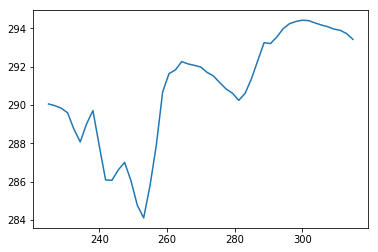

In [108]:
iplt.plot(ts)
plt.show()

For comparison, lets plot the result of ``iplt.plot`` next to ``qplt.plot``:

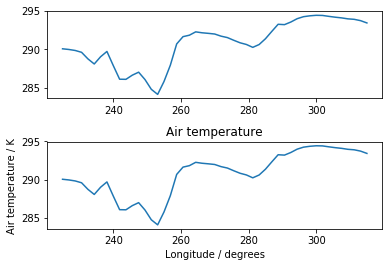

In [109]:
plt.subplot(2, 1, 1)
iplt.plot(ts)

plt.subplot(2, 1, 2)
qplt.plot(ts)

plt.subplots_adjust(hspace=0.5)
plt.show()

Notice how the result of qplt has axis labels and a title; everything else about the axes is identical.

The plotting functions in Iris have strict rules on the dimensionality of the inputted cubes. For example, a 2d cube is needed in order to create a contour plot:

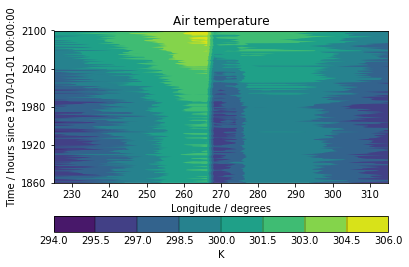

In [110]:
qplt.contourf(cube[:, 0, :])
plt.show()

In [111]:
cube

<iris 'Cube' of air_temperature / (K) (time: 240; latitude: 37; longitude: 49)>

### Maps with cartopy

When the result of a plot operation is a map, Iris will automatically create an appropriate cartopy axes if one doesn't already exist.

We can use matplotlib's `gca()` function to get hold of the automatically created cartopy axes:

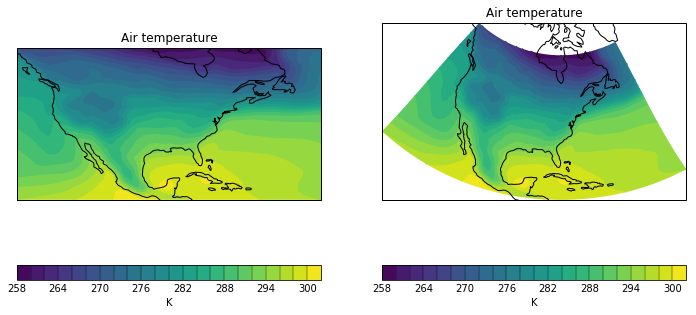

In [112]:
import cartopy.crs as ccrs

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
qplt.contourf(cube[0, ...], 25)
ax = plt.gca()
ax.coastlines()

ax = plt.subplot(1, 2, 2, projection=ccrs.RotatedPole(100, 37))
qplt.contourf(cube[0, ...], 25)
ax.coastlines()

plt.show()

### Exercise 4

Use the above cube, with appropriate indexing, to produce the following:

1\. a **contourf** map on a LambertConformal projection (with coastlines)

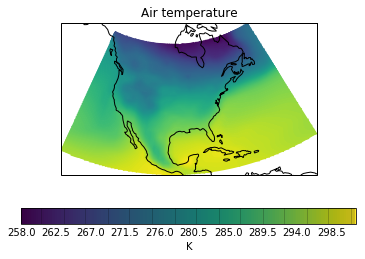

In [139]:
ax = plt.axes(projection=ccrs.LambertConformal())
qplt.contourf(cube[0,...], 200)
ax.coastlines()
plt.show()

2\. a block plot (**pcolormesh**) map in its native projection  (with coastlines)

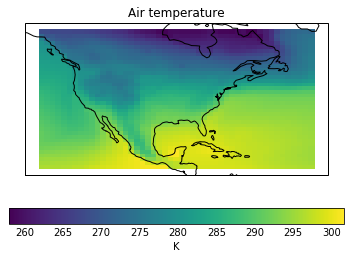

In [141]:
qplt.pcolormesh(cube[0,...])
ax = plt.gca()
ax.coastlines()
plt.show()

3\. a **scatter** plot showing *air_temperature* vs *longitude* (hint: the inputs to scatter can be a combination of coordinates or 1D cubes)

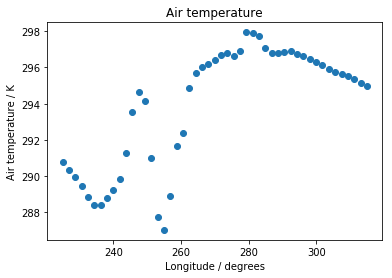

In [143]:
y = cube[0, 0, ...]
constr = iris.Constraint(latitude=27.5)
y1 = cube.extract(constr)[0]
x = cube.coord('longitude')
qplt.scatter(x, y1)

In [144]:
print(cube.coord('longitude'))

DimCoord(array([225.   , 226.875, 228.75 , 230.625, 232.5  , 234.375, 236.25 ,
       238.125, 240.   , 241.875, 243.75 , 245.625, 247.5  , 249.375,
       251.25 , 253.125, 255.   , 256.875, 258.75 , 260.625, 262.5  ,
       264.375, 266.25 , 268.125, 270.   , 271.875, 273.75 , 275.625,
       277.5  , 279.375, 281.25 , 283.125, 285.   , 286.875, 288.75 ,
       290.625, 292.5  , 294.375, 296.25 , 298.125, 300.   , 301.875,
       303.75 , 305.625, 307.5  , 309.375, 311.25 , 313.125, 315.   ],
      dtype=float32), standard_name='longitude', units=Unit('degrees'), var_name='longitude', coord_system=GeogCS(6371229.0))


### Cube maths

Basic mathematical operators exist on the cube to allow one to add, subtract, divide, multiply and perform other mathematical operations on cubes of a similar shape to one another:

In [145]:
a1b = iris.load_cube(iris.sample_data_path('A1B_north_america.nc'))
e1 = iris.load_cube(iris.sample_data_path('E1_north_america.nc'))

print(e1.summary(True))
print(a1b)

air_temperature / (K)               (time: 240; latitude: 37; longitude: 49)
air_temperature / (K)               (time: 240; latitude: 37; longitude: 49)
     Dimension coordinates:
          time                           x              -              -
          latitude                       -              x              -
          longitude                      -              -              x
     Auxiliary coordinates:
          forecast_period                x              -              -
     Scalar coordinates:
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m
     Attributes:
          Conventions: CF-1.5
          Model scenario: A1B
          STASH: m01s03i236
          source: Data from Met Office Unified Model 6.05
     Cell methods:
          mean: time (6 hour)


In [149]:
scenario_difference = a1b - e1
scenario_difference.rename('air_temperature_diff')
print(scenario_difference)

air_temperature_diff / (K)          (time: 240; latitude: 37; longitude: 49)
     Dimension coordinates:
          time                           x              -              -
          latitude                       -              x              -
          longitude                      -              -              x
     Auxiliary coordinates:
          forecast_period                x              -              -
     Scalar coordinates:
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m


Notice that the resultant cube's name is now `unknown` and that resultant cube's `attributes` and `cell_methods` have disappeared; this is because these all differed between the two input cubes.

It is also possible to operate on cubes with numeric scalars, NumPy arrays and even cube coordinates:

In [150]:
print(e1 * e1.coord('latitude'))

unknown / (0.0174532925199433 K.rad) (time: 240; latitude: 37; longitude: 49)
     Dimension coordinates:
          time                            x              -              -
          latitude                        -              x              -
          longitude                       -              -              x
     Auxiliary coordinates:
          forecast_period                 x              -              -
     Scalar coordinates:
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m


Cube broadcasting is also taking place, meaning that the two inputs (cube, coordinate, array, or even constant value) don't need to have the same shape:

In [151]:
print(e1 + 5.0)

unknown / (K)                       (time: 240; latitude: 37; longitude: 49)
     Dimension coordinates:
          time                           x              -              -
          latitude                       -              x              -
          longitude                      -              -              x
     Auxiliary coordinates:
          forecast_period                x              -              -
     Scalar coordinates:
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m


As we've just seen, we have the ability to update the cube's data directly. Whenever we do this though, we should be mindful of updating appropriate metadata on the cube:

In [152]:
e1_hot = e1.copy()

e1_hot.data = np.ma.masked_less_equal(e1_hot.data, 280)
e1_hot.rename('air temperatures greater than 280K')
print(e1_hot)

air temperatures greater than 280K / (K) (time: 240; latitude: 37; longitude: 49)
     Dimension coordinates:
          time                                x              -              -
          latitude                            -              x              -
          longitude                           -              -              x
     Auxiliary coordinates:
          forecast_period                     x              -              -
     Scalar coordinates:
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m
     Attributes:
          Conventions: CF-1.5
          Model scenario: E1
          STASH: m01s03i236
          source: Data from Met Office Unified Model 6.05
     Cell methods:
          mean: time (6 hour)


### Cube aggregation and statistics

Many standard univariate aggregations exist in Iris. Aggregations allow one or more dimensions of a cube to be statistically collapsed for the purposes of statistical analysis of the cube's data. Iris uses the term 'aggregators' to refer to the statistical operations that can be used for aggregation.

A list of aggregators is available at http://scitools.org.uk/iris/docs/latest/iris/iris/analysis.html.

In [153]:
fname = iris.sample_data_path('uk_hires.pp')
cube = iris.load_cube(fname, 'air_potential_temperature')
print(cube.summary(True))

air_potential_temperature / (K)     (time: 3; model_level_number: 7; grid_latitude: 204; grid_longitude: 187)


To take the vertical mean of this cube:

In [154]:
print(cube.collapsed('model_level_number', iris.analysis.MEAN))

air_potential_temperature / (K)     (time: 3; grid_latitude: 204; grid_longitude: 187)
     Dimension coordinates:
          time                           x                 -                    -
          grid_latitude                  -                 x                    -
          grid_longitude                 -                 -                    x
     Auxiliary coordinates:
          forecast_period                x                 -                    -
          surface_altitude               -                 x                    x
     Derived coordinates:
          altitude                       -                 x                    x
     Scalar coordinates:
          forecast_reference_time: 2009-11-19 04:00:00
          level_height: 696.6666 m, bound=(0.0, 1393.3333) m
          model_level_number: 10, bound=(1, 19)
          sigma: 0.92292976, bound=(0.8458596, 1.0)
     Attributes:
          STASH: m01s00i004
          source: Data from Met Office Unified Model


### Application: Exercise 5

Let's apply all that we've learned about data processing and visualisation in Iris. We will perform data processing and visualisation to compare two possible climate futures scenarios, called the A1B scenario and the E1 scenario.

1\. Load as cubes the datasets found at `iris.sample_data_path('E1_north_america.nc')` and `iris.sample_data_path('A1B_north_america.nc')`. Print the summary of each cube.

In [155]:
e1 = iris.sample_data_path('E1_north_america.nc')
a1b = iris.sample_data_path('A1B_north_america.nc')

In [165]:
#e1 = iris.load_cube(e1)
print(e1)

air_temperature / (K)               (time: 240; latitude: 37; longitude: 49)
     Dimension coordinates:
          time                           x              -              -
          latitude                       -              x              -
          longitude                      -              -              x
     Auxiliary coordinates:
          forecast_period                x              -              -
     Scalar coordinates:
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m
     Attributes:
          Conventions: CF-1.5
          Model scenario: E1
          STASH: m01s03i236
          source: Data from Met Office Unified Model 6.05
     Cell methods:
          mean: time (6 hour)


In [168]:
print(e1.coord('time'))

DimCoord([1860-06-01 00:00:00, 1861-06-01 00:00:00, 1862-06-01 00:00:00,
       1863-06-01 00:00:00, 1864-06-01 00:00:00, 1865-06-01 00:00:00,
       1866-06-01 00:00:00, 1867-06-01 00:00:00, 1868-06-01 00:00:00,
       1869-06-01 00:00:00, 1870-06-01 00:00:00, 1871-06-01 00:00:00,
       1872-06-01 00:00:00, 1873-06-01 00:00:00, 1874-06-01 00:00:00,
       1875-06-01 00:00:00, 1876-06-01 00:00:00, 1877-06-01 00:00:00,
       1878-06-01 00:00:00, 1879-06-01 00:00:00, 1880-06-01 00:00:00,
       1881-06-01 00:00:00, 1882-06-01 00:00:00, 1883-06-01 00:00:00,
       1884-06-01 00:00:00, 1885-06-01 00:00:00, 1886-06-01 00:00:00,
       1887-06-01 00:00:00, 1888-06-01 00:00:00, 1889-06-01 00:00:00,
       1890-06-01 00:00:00, 1891-06-01 00:00:00, 1892-06-01 00:00:00,
       1893-06-01 00:00:00, 1894-06-01 00:00:00, 1895-06-01 00:00:00,
       1896-06-01 00:00:00, 1897-06-01 00:00:00, 1898-06-01 00:00:00,
       1899-06-01 00:00:00, 1900-06-01 00:00:00, 1901-06-01 00:00:00,
       1902-06-01

In [167]:
#a1b = iris.load_cube(a1b)
print(a1b)

air_temperature / (K)               (time: 240; latitude: 37; longitude: 49)
     Dimension coordinates:
          time                           x              -              -
          latitude                       -              x              -
          longitude                      -              -              x
     Auxiliary coordinates:
          forecast_period                x              -              -
     Scalar coordinates:
          forecast_reference_time: 1859-09-01 06:00:00
          height: 1.5 m
     Attributes:
          Conventions: CF-1.5
          Model scenario: A1B
          STASH: m01s03i236
          source: Data from Met Office Unified Model 6.05
     Cell methods:
          mean: time (6 hour)


In [169]:
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt

2a\. Plot the following data in a single figure with three maps in one row:

 * the air temperature in the E1 scenario in 2099, 
 * the air temperature in the A1B scenario in 2099, and
 * the difference between the two scenarios.

Think about the most appropriate matplotlib colormap(s) to use for each plot. Hint: the different matplotlib colormaps can be seen at https://matplotlib.org/1.5.3/examples/color/colormaps_reference.html. 

In [190]:
constr = iris.Constraint(time=lambda cell: cell.point.year==2099)

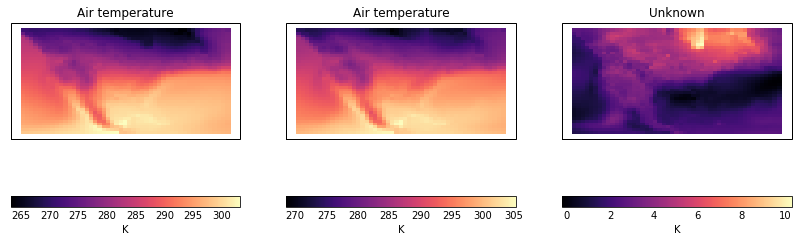

In [194]:
fig = plt.figure(figsize=(14, 7))

ax1 = fig.add_subplot(1, 3, 1)
temp_e1 = e1.extract(constr)
qplt.pcolormesh(temp_e1, linewidth=4, cmap='magma')#

ax2 = fig.add_subplot(1, 3, 2)
temp_a1b = a1b.extract(constr)
qplt.pcolormesh(temp_a1b, linewidth=4, cmap='magma')

ax3 = fig.add_subplot(1, 3, 3)
diff = temp_a1b - temp_e1
qplt.pcolormesh(diff, linewidth=4, cmap='magma')

plt.show()

2b\. What information do your plots show? 

3\. Produce cubes that describe the area-averaged air temperature over time for each scenario. Calculate the model difference between these two cubes.

In [225]:
e1_averaged = e1.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights=weights)
a1b_averaged = a1b.collapsed(['longitude', 'latitude'], iris.analysis.MEAN, weights = weightsa)

dif = a1b_averaged-e1_averaged

print(dif.coord('time'))

DimCoord([1860-06-01 00:00:00, 1861-06-01 00:00:00, 1862-06-01 00:00:00,
       1863-06-01 00:00:00, 1864-06-01 00:00:00, 1865-06-01 00:00:00,
       1866-06-01 00:00:00, 1867-06-01 00:00:00, 1868-06-01 00:00:00,
       1869-06-01 00:00:00, 1870-06-01 00:00:00, 1871-06-01 00:00:00,
       1872-06-01 00:00:00, 1873-06-01 00:00:00, 1874-06-01 00:00:00,
       1875-06-01 00:00:00, 1876-06-01 00:00:00, 1877-06-01 00:00:00,
       1878-06-01 00:00:00, 1879-06-01 00:00:00, 1880-06-01 00:00:00,
       1881-06-01 00:00:00, 1882-06-01 00:00:00, 1883-06-01 00:00:00,
       1884-06-01 00:00:00, 1885-06-01 00:00:00, 1886-06-01 00:00:00,
       1887-06-01 00:00:00, 1888-06-01 00:00:00, 1889-06-01 00:00:00,
       1890-06-01 00:00:00, 1891-06-01 00:00:00, 1892-06-01 00:00:00,
       1893-06-01 00:00:00, 1894-06-01 00:00:00, 1895-06-01 00:00:00,
       1896-06-01 00:00:00, 1897-06-01 00:00:00, 1898-06-01 00:00:00,
       1899-06-01 00:00:00, 1900-06-01 00:00:00, 1901-06-01 00:00:00,
       1902-06-01

4\. Produce a single line plot with the data from the two cubes you produced in part 3. Make sure you label the lines you plot.

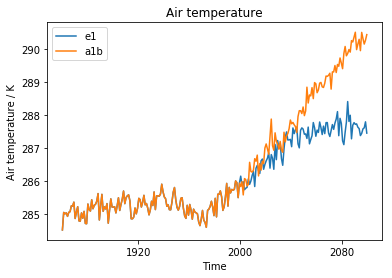

In [202]:
qplt.plot(e1_averaged, label='e1')
qplt.plot(a1b_averaged, label='a1b')

plt.legend()
plt.show()

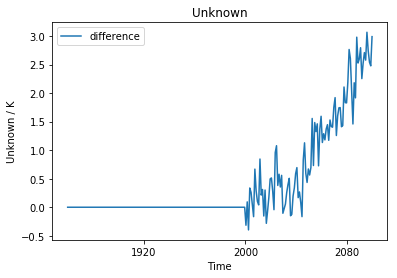

In [203]:
qplt.plot(dif, label='difference')
plt.legend()
plt.show()

In [222]:
e1.coord('longitude').guess_bounds()
a1b.coord('longitude').guess_bounds()

In [224]:
import iris.analysis.cartography

weights = iris.analysis.cartography.area_weights(e1)
weightsa = iris.analysis.cartography.area_weights(a1b)

5\. Extract and compare the area-averaged air temperature values for both scenarios in 1980 and 2099. What conclusions can you draw from the values you've extracted?

In [226]:
constr1 = iris.Constraint(time=lambda cell: cell.point.year==1980)
constr = iris.Constraint(time=lambda cell: cell.point.year==2099)

a120 = a1b_averaged.extract(constr)
a119 = a1b_averaged.extract(constr1)
e120 = e1_averaged.extract(constr)
e119 = e1_averaged.extract(constr1)

print(a120.data, a119.data, e120.data, e119.data)

292.02205419494294 287.2844541212802 289.2764227419217 287.2844541212802


## Advanced concepts

None of the concepts covered in this section are essential for using Iris, but are useful to know. We'll cover them if time permits.

### Load callbacks

Sometimes important data exists in a filename rather than in the file itself, and it is desirable for it to become part of the cube's metadata.
For example, some early GloSea4 model runs recorded the "ensemble member number" (or "realization" in CF terms) in the filename, but not in actual PP metadata itself. As a result, loading the data yielded 2 cubes, rather than a single, fully merged, cube.

In [227]:
fname = iris.sample_data_path('GloSea4', 'ensemble_00[34].pp')
for cube in iris.load(fname, 'surface_temperature'):
    print(cube, '\n', '--' * 50)

surface_temperature / (K)           (time: 6; latitude: 145; longitude: 192)
     Dimension coordinates:
          time                           x            -               -
          latitude                       -            x               -
          longitude                      -            -               x
     Auxiliary coordinates:
          forecast_period                x            -               -
     Scalar coordinates:
          forecast_reference_time: 2011-07-19 00:00:00
     Attributes:
          STASH: m01s00i024
          source: Data from Met Office Unified Model
          um_version: 7.6
     Cell methods:
          mean: time (1 hour) 
 ----------------------------------------------------------------------------------------------------
surface_temperature / (K)           (time: 6; latitude: 145; longitude: 192)
     Dimension coordinates:
          time                           x            -               -
          latitude                       -    

To resolve this we can define a function that gets called during the load process. This must take as arguments:

 * a cube,
 * a 2D field - either a PP field, a NetCDF variable or a GRIB message depending on the file format being loaded, and
 * a filename.

In this case, the function makes the necessary adjustments to include a "realization" coordinate. We pass this function to load, and the result is a successfully merged cube:

In [228]:
import os
def realization_callback(cube, field, fname):
    basename = os.path.basename(fname)
    if not cube.coords('realization') and basename.startswith('ensemble_'):
        cube.add_aux_coord(iris.coords.DimCoord(np.int32(basename[-6:-3]),
                                                'realization'))

print(iris.load_cube(fname, callback=realization_callback))

surface_temperature / (K)           (time: 6; forecast_reference_time: 2; latitude: 145; longitude: 192)
     Dimension coordinates:
          time                           x                           -            -               -
          forecast_reference_time        -                           x            -               -
          latitude                       -                           -            x               -
          longitude                      -                           -            -               x
     Auxiliary coordinates:
          forecast_period                x                           x            -               -
          realization                    x                           x            -               -
     Attributes:
          STASH: m01s00i024
          source: Data from Met Office Unified Model
          um_version: 7.6
     Cell methods:
          mean: time (1 hour)


### Creating extra annotation coordinates for statistical convenience

Sometimes we want to be able to categorise data before performing statistical operations on it. For example, we might want to categorise our data by "daylight maximum" or "seasonal mean" etc. Both of these categorisations would be based on the time coordinate.

The ``iris.coord_categorisation`` module provides convenience functions to add some common categorical coordinates, and provides a generalised function to allow each creation of custom categorisations. 

In [229]:
import iris.coord_categorisation as coord_cat

filename = iris.sample_data_path('ostia_monthly.nc')
cube = iris.load_cube(filename, 'surface_temperature')
print(cube)

surface_temperature / (K)           (time: 54; latitude: 18; longitude: 432)
     Dimension coordinates:
          time                           x             -              -
          latitude                       -             x              -
          longitude                      -             -              x
     Auxiliary coordinates:
          forecast_reference_time        x             -              -
     Scalar coordinates:
          forecast_period: 0 hours
     Attributes:
          Conventions: CF-1.5
          STASH: m01s00i024
     Cell methods:
          mean: month, year


The cube loaded represents the monthly air_temperature from April 2006 through to October 2010. Let's add a categorisation coordinate to this cube to identify the climatological season (i.e "djf", "mam", "jja" or "son") of each time point:

In [230]:
coord_cat.add_season(cube, 'time', name='clim_season')
print(cube)

surface_temperature / (K)           (time: 54; latitude: 18; longitude: 432)
     Dimension coordinates:
          time                           x             -              -
          latitude                       -             x              -
          longitude                      -             -              x
     Auxiliary coordinates:
          clim_season                    x             -              -
          forecast_reference_time        x             -              -
     Scalar coordinates:
          forecast_period: 0 hours
     Attributes:
          Conventions: CF-1.5
          STASH: m01s00i024
     Cell methods:
          mean: month, year


In [ ]:
print(cube.coord('clim_season'))

We can now use the cube's ``aggregated_by`` method to "group by and aggregate" on the season, to produce the seasonal mean:

In [ ]:
seasonal_mean = cube.aggregated_by('clim_season', iris.analysis.MEAN)
print(seasonal_mean)

We can take this further by extracting by our newly created coordinate, producing a plot of the winter zonal mean:

In [ ]:
winter = seasonal_mean.extract(iris.Constraint(clim_season='djf'))

qplt.plot(winter.collapsed('latitude', iris.analysis.MEAN))
plt.title('Winter zonal mean surface temperature at $\pm5^{\circ}$ latitude')
plt.show()

#### Custom categorisation

Custom categorisation can be achieved with an arbitrary function. For example, the existing ``add_year`` categorisor takes the 'time' coordinate, and creates a 'year' coordinate. This could be achieved without using the available ``add_year`` by:

In [ ]:
def year_from_time(coord, point):
    return coord.units.num2date(point).year

coord_cat.add_categorised_coord(cube, 'year', cube.coord('time'),
                                year_from_time)

print(cube.coord('year'))

### Performance tricks

This section details a few common tricks to improve the performance of your Iris code:

 * Data loading.
 * Load once, extract many times.

#### Make use of deferred loading of data

Sometimes it makes sense to load data before doing operations, other times it makes sense to do data reduction before loading:

In [ ]:
def zonal_sum(cube):
    """
    A really silly function to calculate the sum of the grid_longitude
    dimension.
    Don't use this in real life, instead consider doing:
    
        cube.collapsed('grid_longitude', iris.analysis.SUM)
    
    """
    total = 0
    for i, _ in enumerate(cube.coord('grid_longitude')):
        total += cube[..., i].data
    return total

In [ ]:
%%timeit
fname = iris.sample_data_path('uk_hires.pp')
pt = iris.load_cube(fname, 'air_potential_temperature')
result = zonal_sum(pt)

The exact same code, only with the data loaded upfront:

In [ ]:
%%timeit
fname = iris.sample_data_path('uk_hires.pp')
pt = iris.load_cube(fname, 'air_potential_temperature')
pt.data
result = zonal_sum(pt)

#### Load once, extract many times

Iris loading can be slow, particularly if the format stores 2d fields of a conceptually higher dimensional dataset, as is the case with GRIB and PP. To maximise load speed and avoid unncecessary processing, it is worth constraining the fields that are of interest *at load time*, but there is no caching, so loading a file twice will be twice as slow.

In [ ]:
fname = iris.sample_data_path('uk_hires.pp')
model_levels = [1, 4, 7, 16]

In [ ]:
%%timeit
for model_level in model_levels:
    pt = iris.load_cube(fname,
                        iris.Constraint('air_potential_temperature',
                                        model_level_number=model_level))

In [ ]:
%%timeit
cubes = iris.load(fname)
for model_level in model_levels:
    pt = cubes.extract(iris.Constraint('air_potential_temperature',
                                       model_level_number=model_level),
                       strict=True)

For files with lots of different phenomenon this can be improved further by loading only the phenomenon (and in this case just the model levels of interest):

In [ ]:
%%timeit
cube = iris.load(fname,
                 iris.Constraint('air_potential_temperature',
                                 model_level_number=model_levels))
for model_level in model_levels:
    pt = cube.extract(iris.Constraint(model_level_number=model_level))

### Final Exercise

Produce a set of plots that provide a comparison of decadal-mean air temperatures over North America:

**Part 1**

Load 'A1B_north_america.nc' from the Iris sample data.

**Part 2**

Extract just data from the year 1980 and beyond from the loaded data.

**Part 3**

Define a function that takes a coordinate and a single time point as arguments, and returns the decade. For example, your function should return 2010 for the following:

```python
time = iris.coords.DimCoord([10], 'time',
                           units='days since 2018-01-01')
print(your_decade_function(time, time.points[0]))
```

**Part 4**

Add a "decade" coordinate to the loaded cube using your function and the coord categorisation module.

**Part 5**

Calculate the decadal means cube for this scenario.

**Part 6**

Create a figure with 3 rows and 4 columns displaying the decadal means, with the decade displayed prominently in each axes' title.